In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/GIT/Airline

/content/drive/MyDrive/Colab Notebooks/GIT/Airline


In [ ]:
df = pd.read_csv('international-airline-passengers.csv')

In [ ]:
df.shape

(145, 2)

In [ ]:
! pip install pmdarima # this package would be needed for AutoARIMA

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm

import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

In [ ]:
# ERROR
def errors(prediction,actual):
    mae = np.mean(np.abs(prediction - actual))
    mape = np.mean(np.abs(prediction - actual)/np.abs(actual))
    rmse = np.mean((prediction - actual)**2)**0.5
    return({'mae':mae,'mape':mape,'rmse':rmse})

In [ ]:
#ADF TEST

def adf_test(series):
    result = adfuller(series.dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    return result

In [ ]:
df.shape

(145, 2)

In [ ]:
df.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [ ]:
df.tail()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [ ]:
df.isnull().sum()

Month                                                                             0
International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60    1
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(144, 2)

In [ ]:
df.columns=['Month', 'No of Passangers']

In [ ]:
df.tail()

,Month,No of Passangers
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [ ]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Month             144 non-null    datetime64[ns]
 1   No of Passangers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [ ]:
type(df['Month'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
df.index=df['Month']

In [ ]:
df.head()

,Month,No of Passangers
Month,,
1949-01-01,1949-01-01,112.0
1949-02-01,1949-02-01,118.0
1949-03-01,1949-03-01,132.0
1949-04-01,1949-04-01,129.0
1949-05-01,1949-05-01,121.0


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.drop('Month', axis=1, inplace=True)

In [ ]:
df.columns

Index(['No of Passangers'], dtype='object')

In [ ]:
df.head()

,No of Passangers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [ ]:
rolling_mean = df['No of Passangers'].rolling(window=12).mean()

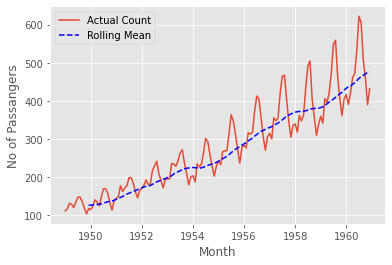

In [ ]:
plt.plot(df['No of Passangers'],label='Actual Count')
plt.plot(rolling_mean, color='blue', linestyle='dashed',label='Rolling Mean')
plt.legend(['Actual Count', 'Rolling Mean'],loc='upper left')
plt.xlabel('Month')
plt.ylabel('No of Passangers')
plt.show()

The series has an upward trend and an early seasonality

In [ ]:
components = seasonal_decompose(df, model='additive')

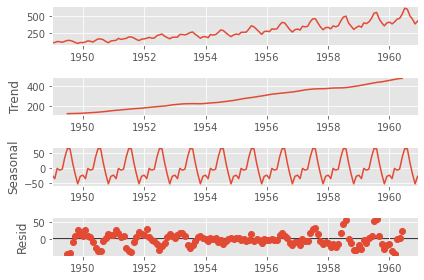

In [ ]:
components.plot()
plt.show()

The series has trend and seasonality and difference might be needed to make it stationary. Consider significance of 0.05

In [ ]:
series=df['No of Passangers']

In [ ]:
result=adf_test(series)

ADF Statistic: 0.815369
p-value: 0.991880


p > alpha(significance), We cannot reject the null hypothesis. We accept the null hypothesis that the series is not stationary. 

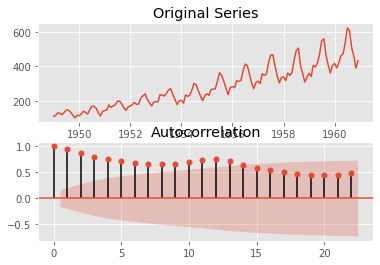

In [ ]:
# Line and ACF Plot of the Original Series
fig, axes = plt.subplots(2)
axes[0].plot(series); axes[0].set_title('Original Series')
plot_acf(series, ax=axes[1])
plt.show()

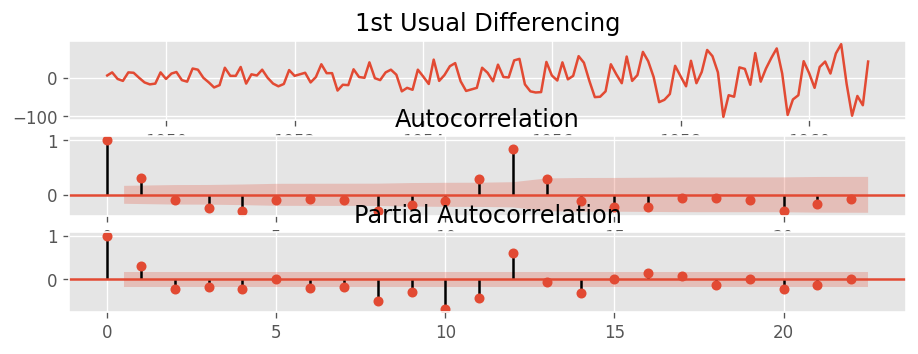

In [ ]:
# Line, ACF, and PCF Plot of the Original Series after first USUAL differencing
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
fig, axes = plt.subplots(3)
axes[0].plot(series.diff()); axes[0].set_title('1st Usual Differencing')
#axes[1].set(ylim=(0,2))
plot_acf(series.diff().dropna(), ax=axes[1])
plot_pacf(series.diff().dropna(), ax=axes[2])

plt.show()

In [ ]:
# Performing the ADF-test of the series after first differencing
result2=adf_test(series.diff(12))

ADF Statistic: -3.383021
p-value: 0.011551


### p<0.05; d=1

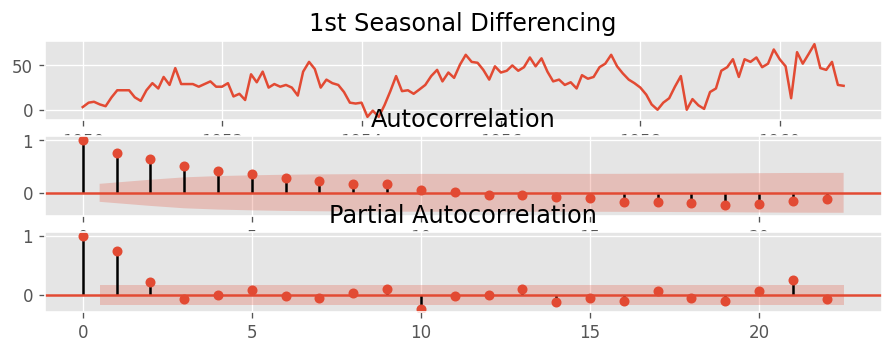

In [ ]:
# Line, ACF, and PCF Plot of the Original Series after first SEASONAL differencing
fig, axes = plt.subplots(3)
axes[0].plot(series.diff(12)); axes[0].set_title('1st Seasonal Differencing')
plot_acf(series.diff(12).dropna(), ax=axes[1])
plot_pacf(series.diff(12).dropna(), ax=axes[2])

plt.show()

p=1, d=1,q=1; P=1,D=1,Q=3, s=12

Final Model:

SARIMA(1,1,1)X(1,1,3,12)¶

Seasonal ARIMA

In [ ]:
# Splitting the series into train and test(last 24 months of test data)

In [ ]:
train=series[:-24]
test=series[-24:]

In [ ]:
import statsmodels.api as sm

In [ ]:
mod = sm.tsa.statespace.SARIMAX(series, order=(1,1,1), seasonal_order=(1,1,3,12))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
res=mod.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
# validating on the last 24 months of test data
forecast=res.predict(start=120,end=143,dynamic=True)

In [ ]:
#Error in manual calculation 
errors_manual=errors(forecast,test) #test=series[120:]
errors_manual

{'mae': 63.6225822191386,
 'mape': 0.1383658352155334,
 'rmse': 69.64546653059345}

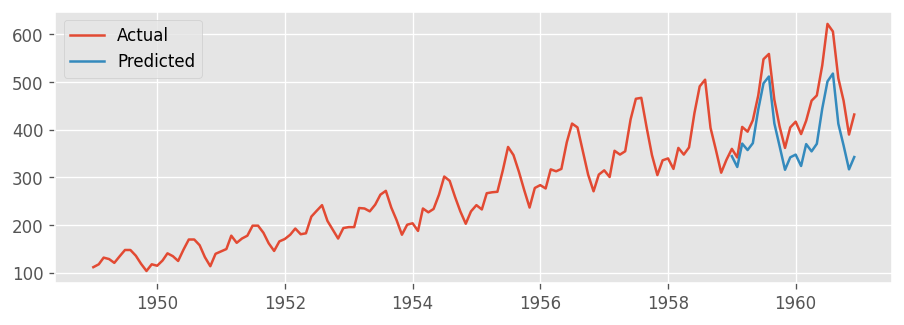

In [ ]:
plt.plot(series,label = 'Actual')
plt.plot(forecast,label = 'Predicted')
plt.legend(['Actual','Predicted'], loc='upper left')
plt.show()

#Auto ARIMA

In [ ]:
model = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=12,              # periodicity of 12 months as the data timeline is in months
                      d=None,           # let the model determine 'd'
                      seasonal=True,   # Seasonality
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=806.570, Time=0.31 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=807.655, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=804.973, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=805.408, Time=0.23 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=803.281, Time=0.05 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=805.044, Time=0.16 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.81 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=805.093, Time=0.09 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=804.813, Time=0.09 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=803.650, Time=0.06 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=806.793, Time=0.16 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=805.281, Time=0.11 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 2.242 seconds
                                     SARIMAX Results                                      


In [ ]:
model.aic()

803.2812826905023

In [ ]:
model.fit(train)

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 1, 0, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
model.aic()

803.2812826905023

In [ ]:
val_forecast=model.predict(n_periods=len(test))

In [ ]:
val_forecast

array([341.95895382, 319.72905571, 363.78417113, 349.77095785,
       364.77412558, 436.77336615, 492.77354822, 506.77350457,
       405.77351503, 360.77351252, 311.77351312, 338.77351298,
       343.73246684, 321.50256872, 365.55768414, 351.54447085,
       366.54763859, 438.54687916, 494.54706122, 508.54701758,
       407.54702804, 362.54702553, 313.54702613, 340.54702599])

In case of Auto Arima the forecast has to be supplied as n_periods BUT for normal ARIMA is has to be supplied as (start,end,dynamic=True)

In [ ]:
val_forecast=pd.Series(val_forecast,index=test.index)
#val_forecast

In [ ]:
errors_auto=errors(val_forecast,test)
errors_auto

{'mae': 68.57726543859545,
 'mape': 0.14927552684163406,
 'rmse': 74.25221997250146}

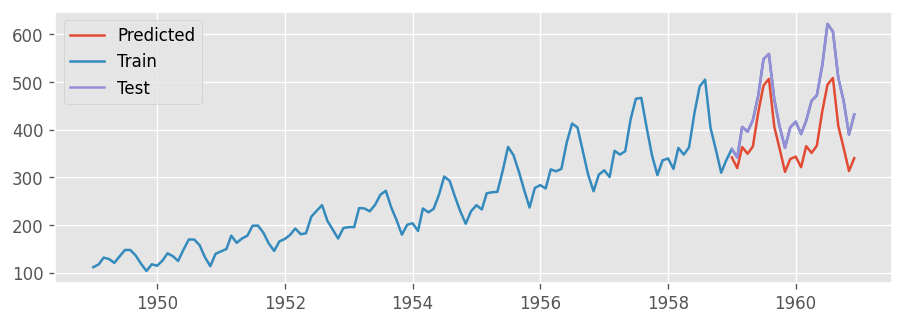

In [ ]:
plt.plot(val_forecast,label = 'Predicted')
plt.plot(series,label = 'Train')
plt.plot(test,label = 'Test')
plt.legend(['Predicted','Train','Test'], loc='upper left')
plt.show()